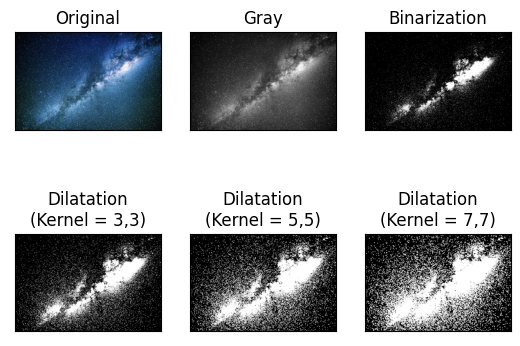

In [1]:
#Подключение библиотек
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

test = [] #список для значений тестирования

#Читаем изображение 
img = cv2.imread('space.jpg')


#Бинаризация изображения
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

#Дилатация
for i in range(30):
    start = time.time()
    img_dilation3 = cv2.dilate(img_bin, np.ones((3, 3), np.uint8), iterations=1)
    end = time.time()
    test.append(end-start)
    
img_dilation5 = cv2.dilate(img_bin, np.ones((5, 5), np.uint8), iterations=1)
img_dilation7 = cv2.dilate(img_bin, np.ones((7, 7), np.uint8), iterations=1)



#Вывод mathplotlib
titles = ['Original', 'Gray', 'Binarization', 'Dilatation\n(Kernel = 3,3)', 'Dilatation\n(Kernel = 5,5)', 'Dilatation\n(Kernel = 7,7)']
images = [img, img_gray, img_bin, img_dilation3, img_dilation5, img_dilation7]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



In [2]:
#Вывод opencv
from win32api import GetSystemMetrics

w = GetSystemMetrics(0)
h = GetSystemMetrics(1)
flag = True
flag_all = False

#Снизу отрисовка с координатами экрана (для красоты)
while True:
    if flag:
        img_show = img_bin
    else:
        img_show = img_dilation3
    
    if flag_all == True:
        cv2.imshow('Original', cv2.resize (img, dsize = (300, 300)))
        cv2.imshow('Gray', cv2.resize (img_gray, dsize = (300, 300)))
        cv2.imshow('Binarization', cv2.resize (img_bin, dsize = (300, 300)))
        cv2.imshow('Dilatation kernel = (3,3)', cv2.resize (img_dilation3, dsize = (300, 300)))
        cv2.imshow('Dilatation kernel = (5,5)', cv2.resize (img_dilation5, dsize = (300, 300)))
        cv2.imshow('Dilatation kernel = (7,7)', cv2.resize (img_dilation7, dsize = (300, 300)))

        # 1 строчка
        cv2.moveWindow("Original", int((w - 300 * 3) / 4), int((h - 300 * 2) / 3))
        cv2.moveWindow("Gray", int((w - 300 * 3) / 4 * 2 + 300), int((h - 300 * 2) / 3))
        cv2.moveWindow("Binarization", int((w - 300 * 3) / 4 * 3 + 600), int((h - 300 * 2) / 3))

        # 2 строчка
        cv2.moveWindow("Dilatation kernel = (3,3)", int((w - 300 * 3) / 4), int((h - 300 * 2) / 3 * 2 + 300))
        cv2.moveWindow("Dilatation kernel = (5,5)", int((w - 300 * 3) / 4 * 2 + 300), int((h - 300 * 2) / 3 * 2 + 300))
        cv2.moveWindow("Dilatation kernel = (7,7)", int((w - 300 * 3) / 4 * 3 + 600), int((h - 300 * 2) / 3 * 2 + 300))

    else:
        cv2.imshow('', cv2.resize (img_show, dsize = (500, 500)))
        cv2.moveWindow("", int((w - 500) / 2), int((h - 500) / 2))
    
    key = cv2.waitKey(1)
    if key == ord('.') and flag_all == False:
        flag = not flag
    if key == ord(',') and flag_all == False:
        flag = not flag
    if key == ord('a'):
        cv2.destroyAllWindows()
        flag_all = not flag_all
    if key == ord('q'):
        break
cv2.destroyAllWindows()

In [2]:
#Запись тестов в Excel
excel = open( 'test.xls', 'a' )
excel.write('python opencv')
for element in test:
     excel.write('\t')
     excel.write(str(element))
excel.write('\n')
excel.close()

In [2]:
cv2.imwrite('python_opencv_res.jpg', img_dilation3)

True